In [37]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [38]:
def cpm(a1):
    a=a1._get_numeric_data()
    try:
        cpm=[]
        for i in range(0,len(a.columns)):
                colsum=a.iloc[:,i].sum()

                c1=(a.iloc[:,i]/colsum)*10**6
                cpm.append(c1)
    
    except:
        print("ignore error")
    cpm=np.array(cpm)
    
    return cpm

In [39]:
file=pd.read_csv("GSE196136_Gene_TPM.csv.gz")
file
gene_name=file['Unnamed: 0']

In [40]:
file

,Unnamed: 0,DKO_Reg_1,DKO_Reg_2,DKO_Reg_3,DKO_LG_1,DKO_LG_2,DKO_LG_3,TKO_Reg_1,TKO_Reg_2,TKO_Reg_3,TKO_LG_1,TKO_LG_2,TKO_LG_3
0,PAIP2B,30.423235,31.481529,30.690680,23.076741,24.446241,23.030691,28.993209,25.384073,28.518752,22.866337,19.028723,27.836755
1,TPI1,295.165911,286.821899,298.193357,323.562608,326.530367,319.704187,365.959038,363.797709,362.192449,589.564546,562.893347,579.290049
2,GAK,42.528225,43.112759,44.132967,53.241892,51.704143,50.595894,44.628582,45.236672,44.630383,50.594273,49.083072,46.597626
3,GM17660,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,NCEH1,9.041303,9.248316,9.600357,12.090369,11.144352,10.833156,7.522402,8.527110,7.775421,8.331588,8.123791,8.715401
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23635,RIPPLY1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
23636,ASCC2,47.457822,47.254709,46.757585,43.712417,40.772475,43.435282,46.727313,57.766677,49.816418,53.563440,56.052041,43.771617
23637,GMEB2,20.445040,20.401937,21.145150,20.740721,21.138470,20.099500,21.398968,21.431631,22.199070,22.052951,19.376705,19.946862
23638,CXCR6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [41]:
cpm=cpm (file)

In [6]:
cpm

array([[ 30.42323459, 295.16591062,  42.52822463, ...,  20.44504026,
          0.        ,   0.        ],
       [ 31.48152885, 286.82189873,  43.11275868, ...,  20.40193697,
          0.        ,   0.        ],
       [ 30.6906804 , 298.19335685,  44.13296673, ...,  21.14514984,
          0.        ,   0.        ],
       ...,
       [ 22.8663369 , 589.56454624,  50.5942728 , ...,  22.0529506 ,
          0.        ,   0.        ],
       [ 19.02872301, 562.89334721,  49.08307198, ...,  19.3767052 ,
          0.        ,   0.        ],
       [ 27.83675463, 579.29004905,  46.59762554, ...,  19.94686166,
          0.        ,   0.        ]])

In [7]:
logv=np.log2(cpm+1)

In [8]:
logv

array([[4.97375979, 8.21026178, 5.44387927, ..., 4.42257212, 0.        ,
        0.        ],
       [5.02154763, 8.16903255, 5.46312408, ..., 4.41966947, 0.        ,
        0.        ],
       [4.98598673, 8.22493433, 5.49610971, ..., 4.46891885, 0.        ,
        0.        ],
       ...,
       [4.57690525, 9.20595094, 5.68913902, ..., 4.52687951, 0.        ,
        0.        ],
       [4.32399854, 9.13927851, 5.64625115, ..., 4.34884889, 0.        ,
        0.        ],
       [4.8498369 , 9.18063038, 5.5728177 , ..., 4.3886622 , 0.        ,
        0.        ]])

In [9]:
#file=file.values

<AxesSubplot:>

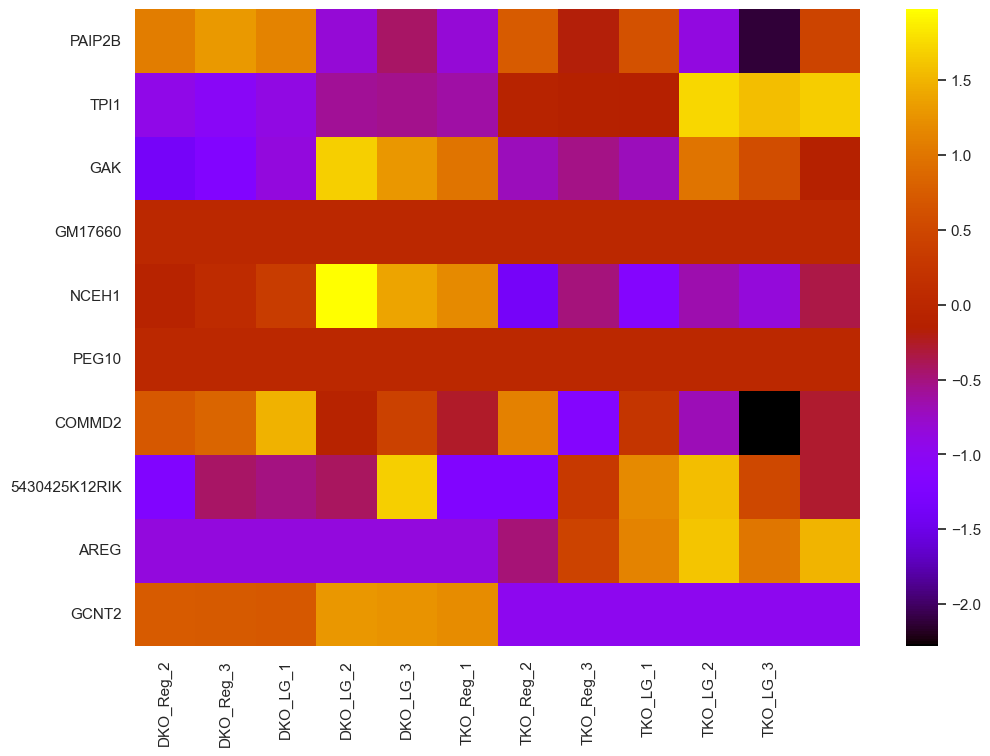

In [10]:
import scipy.stats as st
zscr=st.zscore(logv)
    
zscr=pd.DataFrame(zscr)
new=zscr.T
#new['gene']=id1
zscr=new.fillna(0)
#zscr['gene']=id1
zscr=zscr.values
    
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(zscr[0:10],xticklabels=file.columns[2:14], yticklabels=gene_name[0:10],annot=False,cmap='gnuplot')
    

In [11]:
vec1=logv[0:6]

In [12]:
vec1 #control

array([[4.97375979, 8.21026178, 5.44387927, ..., 4.42257212, 0.        ,
        0.        ],
       [5.02154763, 8.16903255, 5.46312408, ..., 4.41966947, 0.        ,
        0.        ],
       [4.98598673, 8.22493433, 5.49610971, ..., 4.46891885, 0.        ,
        0.        ],
       [4.58956823, 8.34235299, 5.76133558, ..., 4.4423279 , 0.        ,
        0.        ],
       [4.66938065, 8.35548486, 5.71984448, ..., 4.46848362, 0.        ,
        0.        ],
       [4.58680624, 8.32509938, 5.68918436, ..., 4.39913688, 0.        ,
        0.        ]])

In [13]:
vec2=logv[7:12]

In [14]:
vec2 # tumor

array([[4.72159537, 8.51095286, 5.53096566, ..., 4.48746263, 0.        ,
        0.        ],
       [4.8835598 , 8.5045904 , 5.51192286, ..., 4.53599504, 0.        ,
        0.        ],
       [4.57690525, 9.20595094, 5.68913902, ..., 4.52687951, 0.        ,
        0.        ],
       [4.32399854, 9.13927851, 5.64625115, ..., 4.34884889, 0.        ,
        0.        ],
       [4.8498369 , 9.18063038, 5.5728177 , ..., 4.3886622 , 0.        ,
        0.        ]])

In [15]:
meanTumor=np.mean(vec1,axis=0)

In [16]:
meanTumor

array([4.80450821, 8.27119432, 5.59557958, ..., 4.43685147, 0.        ,
       0.        ])

In [17]:
meanControl=np.mean(vec2,axis=0)

In [18]:
meanControl

array([4.67117917, 8.90828062, 5.59021928, ..., 4.45756965, 0.        ,
       0.        ])

In [19]:
from scipy.stats import ttest_ind

In [20]:
pvalue=ttest_ind(vec1,vec2).pvalue

In [21]:
pvalue

array([0.33983312, 0.00235235, 0.94176709, ..., 0.58244455,        nan,
              nan])

In [22]:
log2FC=meanTumor-meanControl

In [23]:
log2FC

array([ 0.13332904, -0.6370863 ,  0.0053603 , ..., -0.02071818,
        0.        ,  0.        ])

In [24]:
result=np.stack((meanTumor,meanControl,log2FC,pvalue),axis=0)

In [25]:
result

array([[ 4.80450821e+00,  8.27119432e+00,  5.59557958e+00, ...,
         4.43685147e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.67117917e+00,  8.90828062e+00,  5.59021928e+00, ...,
         4.45756965e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.33329041e-01, -6.37086301e-01,  5.36030227e-03, ...,
        -2.07181815e-02,  0.00000000e+00,  0.00000000e+00],
       [ 3.39833119e-01,  2.35234824e-03,  9.41767087e-01, ...,
         5.82444550e-01,             nan,             nan]])

In [26]:
r=pd.DataFrame(result)
r=r.T

In [27]:
r.columns=["meanTumor","meanControl","log2FC","pvalue"]

In [28]:
r['gene']=gene_name

In [29]:
#r["gene"] = r.gene.shift(-1)
col_1=r.pop('gene')
r.insert(0,'gene',col_1)

In [30]:
r

,gene,meanTumor,meanControl,log2FC,pvalue
0,PAIP2B,4.804508,4.671179,0.133329,0.339833
1,TPI1,8.271194,8.908281,-0.637086,0.002352
2,GAK,5.595580,5.590219,0.005360,0.941767
3,GM17660,0.000000,0.000000,0.000000,NaN
4,NCEH1,3.494773,3.215507,0.279266,0.004032
...,...,...,...,...,...
23635,RIPPLY1,0.000000,0.000000,0.000000,NaN
23636,ASCC2,5.518272,5.726546,-0.208274,0.020382
23637,GMEB2,4.436851,4.457570,-0.020718,0.582445
23638,CXCR6,0.000000,0.000000,0.000000,NaN


In [31]:
r['pvalue']=r['pvalue'].fillna(1)

In [32]:
r

,gene,meanTumor,meanControl,log2FC,pvalue
0,PAIP2B,4.804508,4.671179,0.133329,0.339833
1,TPI1,8.271194,8.908281,-0.637086,0.002352
2,GAK,5.595580,5.590219,0.005360,0.941767
3,GM17660,0.000000,0.000000,0.000000,1.000000
4,NCEH1,3.494773,3.215507,0.279266,0.004032
...,...,...,...,...,...
23635,RIPPLY1,0.000000,0.000000,0.000000,1.000000
23636,ASCC2,5.518272,5.726546,-0.208274,0.020382
23637,GMEB2,4.436851,4.457570,-0.020718,0.582445
23638,CXCR6,0.000000,0.000000,0.000000,1.000000


In [33]:
r.to_csv("deg.csv",index=False)

In [34]:
#pip install bioinfokit

In [35]:
from bioinfokit import analys, visuz

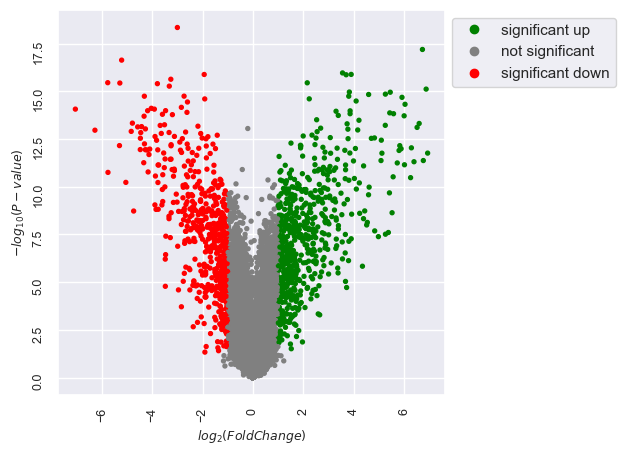

In [36]:
visuz.GeneExpression.volcano(r, lfc='log2FC', pv='pvalue',plotlegend=True, legendpos='upper right', 
    legendanchor=(1.46,1),show=True)